# Introduction to Accessing Astronomical Databases
## Notebook prepared by L.A. Hillenbrand for Ay107 
### v1.0 dec2021
### v1.1 may2023

The possibilities for interacting with online databases in astronomy are vast.
The purpose of this notebook is to give you some useful intro to the kinds of things that can be done.
Queries into any individual database are specialized to its specific API and protocols, so there is not an obvious generalization of anything that is below -- you just need to read the relevant documentation for your specific database of interest.

The upside is that once you have the data you are seeking downloaded directly into a python-able data structure (list, array, pandas table, .fits file, etc), you can then work as you would normally.   You can also alter your queries and simply re-run and e.g. re-plot.  The alternate method is to find and navigate the various websites we were perusing last week (see class slides), set up and run your queries via html, download the data to your own disk, and then import into python -- overall less efficient.  

A downside of database querying like we are doing here, is increased strain on the database servers given how easy it is to shift-return again and again!

In [1]:
# General Imports

import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.wcs import WCS

from astropy.coordinates import SkyCoord
from astropy import units as u

In [2]:
#help(SkyCoord)

# I don't find the help very helpful, but SkyCoord is a powerful tool 
# for dealing with astronomical coordinates and e.g. converting between reference frames.

In [3]:
# Make plots display in the notebook
%matplotlib inline 

# Suppress warnings. Comment this out if you wish to see all the lovely warning messages
import warnings
warnings.filterwarnings('ignore')

# We are using [astroquery](http://astroquery.readthedocs.io/en/latest/).

This is a powerful tool to access all kinds of on-line astronomical literature, catalogs, archives and other resources.  

Astroquery lets us go right to the information content -- within python -- which thus allows immediate analysis, e.g. math or other manipulation, and plotting right here in the notebook.

You should read up on the astroquery capabilities and syntax.

****

-  We will first look at some example use cases involving literature tables and published catalogs, paralleling our look last week at the websites for <i>Vizier</i> and <i>SIMBAD</i>.  The main point here, is that anything you can access via a web browser, you can also do directly in a python notebook.
> ==> Example 1 and Example 2

-  Then -- and much more interestingly -- we will query mission data from data archives, paralleling our look last week of the <i>Gaia</i> astrometry mission.  This is just the tip of the iceberg, both in terms of Gaia content, and with catalog queries in general.
> ==> Example 3 and Example 4
 
-  It is also possible to cross-match catalog data from one mission e.g. <i>Gaia</i> with another catalog e.g. <i>2MASS</i>.
> ==> Example 5
 
-  Finally we will look at pulling non-catalog but actual .fits files, containing e.g. images or spectra, from data archives in the case of <i>SDSS</i>.  There are also hints that this can be done from the major NASA mission archives, e.g. <i>HESEARC</i>, <i>MAST</i>, and <i>IRSA</i>.
> ==> Example 6 and Example 7

****

# ** Example 1 **

## Get data from the literature

Large data tables from both major survey catalogs and also individual published papers usually wind up being served by [Vizier](http://vizier.u-strasbg.fr/viz-bin/VizieR).

### As for other modules, there is [astroquery help and examples](https://astroquery.readthedocs.io/en/latest/vizier/vizier.html) on how to access the vast Vizier holdings.


In [4]:
# Database-specific Imports

from astroquery.vizier import Vizier
help(Vizier)

# In order to see all the data, need to turn off the row limit of 50 rows.
Vizier.ROW_LIMIT = -1

Help on VizierClass in module astroquery.vizier.core object:

class VizierClass(astroquery.query.BaseQuery)
 |  VizierClass(columns=['*'], column_filters={}, catalog=None, keywords=None, ucd='', timeout=60, vizier_server='vizier.u-strasbg.fr', row_limit=50)
 |  
 |  Method resolution order:
 |      VizierClass
 |      astroquery.query.BaseQuery
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, columns=['*'], column_filters={}, catalog=None, keywords=None, ucd='', timeout=60, vizier_server='vizier.u-strasbg.fr', row_limit=50)
 |      Parameters
 |      ----------
 |      columns : list
 |          List of strings
 |      column_filters : dict
 |      catalog : str or None
 |      keywords : str or None
 |      ucd : string
 |          "Unified Content Description" column descriptions.  Specifying
 |          these will select only catalogs that have columns matching the
 |          column descriptions defined on the Vizier web pages.
 |          See http://v

## 1a.

As a first example, we can examine data tables from a particular paper that was published, [Bhardwaj et al. 2017](https://ui.adsabs.harvard.edu/?#abs/2017A%26A...605A.100B) which presents a catalog of Type II Cepheids. 

These are a type of variable star that pulsate with periods between 1 and 50 days.  They have a famous period-luminosity relation which forms a key part of the extragalactic distance scale.

We can grab the data table and make a quick plot.


In [5]:
# The key thing we need is the Vizier catalog number, which we can get by clicking the link above 
# for the paper and following the link on the right to CDS.
# In example 1b below, we show how to find these paper keys via the notebook.

catalog = Vizier.get_catalogs('J/A+A/605/A100')

In [6]:
# See what we've got.

catalog

TableList with 1 tables:
	'0:J/A+A/605/A100/table1' with 16 column(s) and 264 row(s) 

In [7]:
# There is only one table from this paper, so let's take a look.
# You would have to look at the paper for definitive knowledge of what all the columns mean.

catalog[0]

VVV-ID,OGLE-ID,Period,Class,__Vmag_,__Imag_,__Jmag_,__Hmag_,__Ksmag_,e__Jmag_,e__Hmag_,e__Ksmag_,E_J-Ks_,Simbad,_RA,_DE
,,d,,mag,mag,mag,mag,mag,mag,mag,mag,mag,,deg,deg
str12,str9,float32,str3,float32,float32,float32,float32,float32,float32,float32,float32,float32,str6,float64,float64
515601356315,T2CEP-002,2.268,BLH,15.188,13.909,13.116,12.766,12.521,0.072,0.072,0.072,0.173,Simbad,256.56250,-33.02433
515601679485,T2CEP-003,1.484,BLH,16.519,15.061,14.240,13.855,13.387,0.104,0.104,0.104,0.290,Simbad,257.16725,-32.90289
515594023082,T2CEP-005,2.008,BLH,18.666,16.842,15.845,15.354,14.788,0.152,0.153,0.150,0.388,Simbad,258.48767,-32.26000
515520862858,T2CEP-008,1.183,BLH,17.765,15.970,--,14.205,13.935,--,0.060,0.058,0.410,Simbad,261.08721,-27.93033
515555436341,T2CEP-009,1.896,BLH,17.630,15.608,13.887,13.343,13.134,0.098,0.098,0.098,0.461,Simbad,261.09287,-29.45986
515534145302,T2CEP-013,1.517,BLH,18.525,16.193,14.550,13.951,13.676,0.117,0.117,0.116,0.588,Simbad,261.99483,-29.43392
515543870338,T2CEP-014,1.239,BLH,15.376,13.590,12.306,11.905,11.613,0.003,0.004,0.092,0.534,Simbad,262.33321,-29.46542
515490128302,T2CEP-015,1.279,BLH,18.087,15.907,14.291,13.712,13.438,0.008,0.010,0.111,0.591,Simbad,263.61708,-27.10525


In [8]:
# We can do something with the data by reading in particular columns.

period = np.array(catalog[0]['Period']) 
log_period = np.log10(period)

k_mag = np.array(catalog[0]['__Ksmag_'])
k_mag_err = np.array(catalog[0]['e__Ksmag_'])

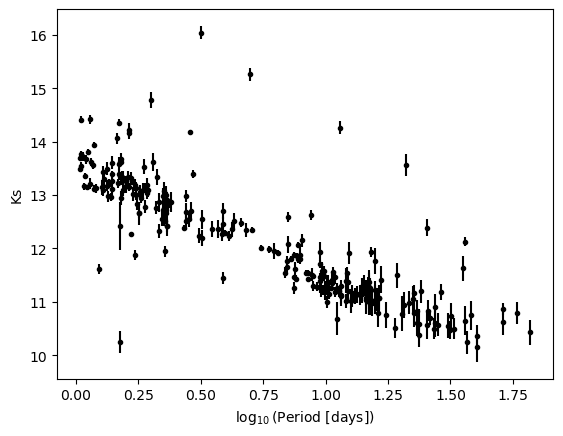

In [9]:
# Make a plot.

plt.xlabel(r'$\log_{10}$(Period [days])')
plt.ylabel('Ks')

plt.errorbar(log_period, k_mag, k_mag_err, fmt='k.')
plt.show()

<font color='red'>
    
# EXERCISE:  
## Plot something else.
</font>

In [18]:
# We can also search Vizier by object, and find all the catalogs Vizier has containing a particular source.

# Let's pick an object name from above
#obj = "OGLE BLG-T2CEP-002"

# Or choose some other source you might know
obj = "HL TAU"

# The key here is knowing the right format for the name, which has to be something that the Simbad catalog uses.a
# As you can see, what' I've called it above is not exactly what is written in the table above.
# You can substitute other sources you might know to work with them below, instead of one from the table.

# So let's see what Vizier has on this object
result = Vizier.query_object(obj)
print(result)

ReadTimeout: HTTPConnectionPool(host='vizier.u-strasbg.fr', port=80): Read timed out. (read timeout=60)

In [12]:
# There is clearly a ton of information on this source!
# We can look at just one of these catalogs that includes our source.

result[16]
#result[190]

# We would have to go to the paper to figure out what some of these columns are.

RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,pmRA,e_pmRA,pmDE,e_pmDE,Dup,FG,e_FG,Gmag,e_Gmag,FBP,e_FBP,BPmag,e_BPmag,FRP,e_FRP,RPmag,e_RPmag,BP-RP,RV,e_RV,Teff,AG,E_BP-RP_,Rad,Lum
deg,mas,deg,mas,,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,,,,mag,mag,,,mag,mag,,,mag,mag,mag,km / s,km / s,K,mag,mag,solRad,solLum
float64,float64,float64,float64,int64,float64,float32,float64,float32,float64,float32,uint8,float32,float32,float64,float64,float32,float32,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float32,float32,float32,float64
256.53311585613,27.7395,-33.04544904949,7.9949,5979960864061721088,--,--,--,--,--,--,0,128.4,3.231,20.4170,0.0273,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
256.54066610746,0.0696,-33.05211111963,0.0436,5979960864058458112,0.6097,0.0834,1.878,0.130,-0.730,0.081,0,4853,3.168,16.4733,0.0007,2391,34.22,16.9048,0.0155,4040,33.17,15.7461,0.0089,1.1587,--,--,5020.00,0.6830,0.3370,1.00,0.567
256.53646606705,0.3178,-33.04804158108,0.1896,5979960859783889536,-0.1645,0.3480,-4.792,0.566,-1.558,0.348,0,482.9,1.17,18.9788,0.0026,307.7,14.65,19.1309,0.0517,612.7,14.87,17.7938,0.0264,1.3371,--,--,--,--,--,--,--
256.53273965044,3.8282,-33.04453834103,5.1589,5979960859855379840,--,--,--,--,--,--,0,191.5,1.834,19.9829,0.0104,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
256.53499406071,28.7408,-33.04733407560,21.9714,5979960864140694784,--,--,--,--,--,--,0,101.4,2.303,20.6735,0.0247,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
256.53106587717,0.1138,-33.04317985677,0.0688,5979960859796869248,0.0965,0.1255,-3.532,0.242,-4.621,0.140,0,2196,1.817,17.3340,0.0009,806.5,15.89,18.0849,0.0214,2160,12.9,16.4255,0.0065,1.6594,--,--,--,--,--,--,--
256.53187499260,12.8516,-33.04393646013,6.1508,5979960859855457280,--,--,--,--,--,--,0,118.3,1.309,20.5058,0.0120,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
256.53335931122,3.3771,-33.04526249330,1.9595,5979960859855460608,--,--,--,--,--,--,0,167.5,1.334,20.1286,0.0086,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--


 For investigating individual objects, it is often easier to just [use the website](https://vizier.u-strasbg.fr/viz-bin/VizieR) and the "Search by Position" box, where you can type in the Simbad-recognized name or a coordinate.

<font color='red'>
    
# EXERCISE:  
## Go ahead and do this, using the same object name.  You can then search in your browser for one of the more obscure column names in order to locate the table line above. 
    
## Note that in the .html format you can get more info about the column meanings, and even click-through to the object's lightcurve which the paper authors had provided.
    
## Sometimes the .html and web browser is the best way to acquire information, but often it is the .ipynb and notebook.
</font>

## 1b.  (more vizier general background that can be breezed through)

As a second example, we are searching for tables associated with [Vioque et al. 2018](https://ui.adsabs.harvard.edu/abs/2018A%26A...620A.128V/abstract) 'Gaia DR2 study of Herbig Ae/Be stars'.

These are young pre-main sequence stars of intermediate-mass, contracting along radiative tracks and destined to be O, B, and A stars on the main sequence (their lower mass cousins the FGKM pre-main sequence stars are contracting along convective tracks and called T Tauri stars).

Similarly we can look at the tables, find an interesting object, and then go back and query for it in Simbad.

In [ ]:
# Above we fetched a catalog manually, knowing its paper key in Vizier.
# But we can also look at the help for how to search for catalogs 
# relevant to a particular author and year, or the paper subject.
# This returns the full catalog code in Vizier.

help(Vizier.find_catalogs)

In [ ]:
# Let's try to find the Vizier paper key.

#catalog_list = Vizier.find_catalogs('Vioque+, 2018')

catalog_list = Vizier.find_catalogs('Vioque')

print(catalog_list)

In [ ]:
# From the help above, we can get a little more description, namely the paper titles.

print({k:v.description for k,v in catalog_list.items()})

# It would be nice for one of you python jockeys to add some formatting to this mess.

In [ ]:
# It looks like it's the first one that we want.

Vioque = Vizier.get_catalogs('J/A+A/620/A128/')
Vioque


In [ ]:
#See what we have in the first table, which is the big one.

Vioque[0]

<font color='red'>
    
# EXERCISE:  
## Look up somebody else or some other topic, and find a data table.
</font>

In [ ]:
# Look at a particular line of data.

Vioque[0][54]


In [ ]:
# Let's store the source position so we can search some other catalogs by coordinate.

ra = Vioque[0][54]['RAICRS']
dec = Vioque[0][54]['DEICRS']

print(ra,dec)

# Convert from sexagesimal to decimal coordinates
c = SkyCoord(ra, dec, unit=(u.hourangle, u.deg), frame='icrs')
c.ra.degree,c.dec.degree

myra,mydec = str(c.ra.degree),str(c.dec.degree)
print(myra,mydec)

#  ** Example 2  **

## See what SIMBAD knows about an object 

[SIMBAD](https://simbad.u-strasbg.fr/simbad/) is a curated repository of data and literature, primarily on galactic objects including stars and star clusters, but also some nearby galaxies and other relatively bright objects.   

It is organized around the astronomical sources themselves, with links out to papers.
They also have pulled some data, which can be queried, but it is always good to go to the original reference.

### As for other modules, there is [astroquery help and examples](https://astroquery.readthedocs.io/en/latest/simbad/simbad.html) on how to access Simbad.


Just like with Vizier, which was organized as a "catalog of catalogs" rather than a "catalog of stars", 
we can query Simbad from either the webpage, or from within a notebook.

In [ ]:
# Database-specific Imports

from astroquery.simbad import Simbad

In [ ]:
# Let's see what we can access

print('All available fields:')
print(Simbad.list_votable_fields())

print()
print('*******')
print()


In [ ]:
print('Description of a particular field:')
Simbad.get_field_description('plx')


I often use SIMBAD just to look up object coodinates

In [ ]:
# can use the object picked out above from the literature catalog
#obj = name

# or we can define a random different source
obj = 'HL Tau'
result = Simbad.query_object(obj)
result

You can also look around an object

In [ ]:
result = Simbad.query_criteria('region(circle,'+obj+', 30s)')
result

We can also write a custom query to make sure we output some particular information of interest from the data values that SIMBAD stores.

This takes some understanding of the database schema, that is, what it calls the different columns.

I spent a lot of time constructing this so as to get exactly what I want to know when researching objects that pop up as interesting for some reason.   But now that I have it, I find it is easier to query right in the python notebook than to go to the web browser and click around until I assemble what I want.


In [ ]:
customSimbad = Simbad()
customSimbad.add_votable_fields('bibcodelist') #add keyword for the number of references an object has
customSimbad.add_votable_fields('otypes') # add object type
customSimbad.add_votable_fields('sptype') #add spectral type keywrod, see above link for more keywords
customSimbad.add_votable_fields('flux(K)') # add K magnitude keyword
customSimbad.add_votable_fields('flux(R)') # add R magnitude
customSimbad.add_votable_fields('flux(V)') # add V magnitude
customSimbad.add_votable_fields('plx') # add parallax
customSimbad.add_votable_fields('ids') #other identifiers

    
# by name 
query_result = customSimbad.query_object(obj)
# by coordinates in degrees
#query_result2 = customSimbad.query_region(SkyCoord(ra=c.ra.degree, dec=c.dec.degree,unit=(u.deg,u.deg)),radius=searchrad*u.arcmin)
#print(query_result2)

try:
    sid = query_result['MAIN_ID'][0]  #.decode("utf-8")
    npubs = query_result['BIBLIST'][0]
    object_types = query_result['OTYPES'][0] #.decode("utf-8")
    identifiers = query_result['IDS'][0] #.decode("utf-8")

    spectral_type = query_result['SP_TYPE'][0] #.decode("utf-8") # formatting output
    spt_reference = query_result['SP_BIBCODE'][0] #.decode("utf-8")
    #spt_quality = query_result['SP_QUAL'][0].decode("utf-8")
    
    plx = query_result['PLX_VALUE'][0] #not sure what the problem is with pulling this

    K_mag = query_result['FLUX_K'][0]
    R_mag = query_result['FLUX_R'][0]
    V_mag = query_result['FLUX_V'][0]
        
    print('Input_Name \t SIMBAD_MAINID \t\t Object_Type \t\t\t\t Spectral_Type \t SpT_Ref \t #Publications')
    print("{0}\t{1}\t\t{2}\t{3}\t\t{4}\t\t{5}".format(obj, sid, object_types, spectral_type, spt_reference,npubs))
    print()
    print("Other Identifiers and Aliases:\n\n",identifiers)
    print()
    print("Magnitudes at V / R / K = ",V_mag,R_mag,K_mag)
    print()
    print("Distance = ",1000./plx)
except:
    print("{0}\t\t{1}".format(obj, "** NOT IN SIMBAD OR SIMBAD QUERYING ERROR**"))
    print()




In [ ]:
# HD 200775 is a very popular source, with 524 papers about it, and lots of names/aliases!

# HL Tau is even more popular, with 1381 papers on it, and gosh that's a lot of aliases.

In [ ]:
# What reference is that for the spectral type?

query_bibcode='1968PASP...80..197G'  # you can put any bibcode (short for bibliography code) here

# We can also see what other sources of possible interest that paper contained.
result_table = Simbad.query_bibcode(query_bibcode)
print(result_table)
print()
print('https://ui.adsabs.harvard.edu/abs/'+query_bibcode+'/abstract')
print()
print("This paper also includes the following objects known to SIMBAD:")
print()
result_table = Simbad.query_bibobj(query_bibcode)
display(result_table)

In [ ]:
# We can also look around our source of interest, to see if there is anything else interesting nearby

# First take some precautions to limit the output
Simbad.ROW_LIMIT = 50 # fetch up to N rows   
customSimbad.ROW_LIMIT = 50 # fetch up to N rows 
rad = 6 # radius in arcmin

print('Checking what else is around this coordinate, within '+str(rad)+' arcmin')

result = customSimbad.query_criteria('region(circle, HD 200775, 0.1d)')
result

We could also put restrictions on the "search around this object" query, such as searching for only bright stars.


In [ ]:
result = customSimbad.query_criteria('region(circle, HD 200775, 1d) & Vmag < 8 & Bmag < 8')
result

# This yields only 2 stars within a degree, one of which is our source itself.

<font color='red'>
    
# EXERCISE:  
## See if you can get the above searches to work using a coordinate rather than an object name.
</font>

In [24]:
query_result = customSimbad.query_region(SkyCoord(myra,mydec,  unit=(u.deg, u.deg), frame='icrs'), radius=rad*u.arcmin)
print(query_result)


NameError: name 'customSimbad' is not defined

#  ** Example #3  **

# Explore the Gaia mission archive.

Now for something more involved.

Let's see what we can find in other catalogs regarding objects around the star chosen above.

First we should look at Gaia, which has astrometry, optical photometry, and some radial velocity information.

### As for other packages, there is specific [astroquery help and examples](https://astroquery.readthedocs.io/en/latest/gaia/gaia.html).

We are doing something a little different than the above though, and getting deeper into the database itself.

###  The syntax for Gaia queries is [ADQL](https://www.ivoa.net/documents/REC/ADQL/ADQL-20081030.pdf) which is like SQL, but with some astronomy-specific standardization.

### Queries look like the following:

**SELECT** 
TOP 100 source_id, ra, dec, pmra, pmdec, parallax
**FROM** gaiadr2.gaia_source
**WHERE** parallax < 1;

or

**SELECT** 
*
**FROM** gaiadr2.gaia_source
**WHERE** parallax > 30;

This is fundamentally different from the above Vizier searches, where we pulled whole tables over and examined them,
or from the above SIMBAD searches where we did some limited querying, e.g. for bright stars.

Now we can not only query by criteria, but we can put a lot of calculation and even complex table merging <u>onto the database server side</u>.
This is a very powerful capability.

See [here](https://gea.esac.esa.int/archive-help/adql/examples/index.html) for more examples of simple to more complex Gaia database queries.  

In [19]:
# Database-specific Imports

from astroquery.gaia import Gaia
help(Gaia)

Gaia.ROW_LIMIT = 2000  # Set the row limit for returned data

Help on GaiaClass in module astroquery.gaia.core object:

class GaiaClass(astroquery.utils.tap.core.TapPlus)
 |  GaiaClass(tap_plus_conn_handler=None, datalink_handler=None, gaia_tap_server='https://gea.esac.esa.int/', gaia_data_server='https://gea.esac.esa.int/', tap_server_context='tap-server', data_server_context='data-server', verbose=False)
 |  
 |  Proxy class to default TapPlus object (pointing to Gaia Archive)
 |  
 |  Method resolution order:
 |      GaiaClass
 |      astroquery.utils.tap.core.TapPlus
 |      astroquery.utils.tap.core.Tap
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, tap_plus_conn_handler=None, datalink_handler=None, gaia_tap_server='https://gea.esac.esa.int/', gaia_data_server='https://gea.esac.esa.int/', tap_server_context='tap-server', data_server_context='data-server', verbose=False)
 |      Constructor
 |      
 |      Parameters
 |      ----------
 |      url : str, mandatory if no host is specified, default None
 |      

In [20]:
#First load the tables and look at all the available table names:

tables = Gaia.load_tables(only_names=True)

for table in (tables):
    #print(table.name)
    print (table.get_qualified_name())

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
external.external.apassdr9
external.external.gaiadr2_astrophysical_parameters
external.external.gaiadr2_geometric_distance
external.external.gaiaedr3_distance
external.external.gaiaedr3_gcns_main_1
external.external.gaiaedr3_gcns_rejected_1
external.external.gaiaedr3_spurious
external.external.galex_ais
external.external.ravedr5_com
external.external.ravedr5_dr5
external.external.ravedr5_gra
external.external.ravedr5_on
external.external.ravedr6
external.external.sdssdr13_photoprimary
external.external.skymapperdr1_master
external.external.skymapperdr2_master
external.external.tmass_xsc
gaiadr1.gaiadr1.aux_qso_icrf2_match
gaiadr1.gaiadr1.ext_phot_zero_point
gaiadr1.gaiadr1.allwise_best_neighbour
gaiadr1.gaiadr1.allwise_neighbourhood
gaiadr1.gaiadr1.gsc23_best_neighbour
gaiadr1.gaiadr1.gsc23_neighbourhood
gaiadr1.gaiadr1.ppmxl_best_neighbour


In [21]:
# That's a lot of tables!

# Pick one:
mytable = 'gaiadr2.gaia_source'  

In [22]:
# Load the table and see what columns we have at our disposal

mytable_load = Gaia.load_table(mytable)
for column in (mytable_load.columns):
  print(column.name)

Retrieving table 'gaiadr2.gaia_source'
solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
astrometric_weight_al
astrometric_pseudo_colour
astrometric_pseudo_colour_error
mean_varpi_factor_al
astrometric_matched_observations
visibility_periods_used
astrometric_sigma5d_max
frame_rotator_object_type
matched_observations
duplicated_source
phot_g_n_obs
phot_g_mean_flux
phot_g_mean_flux_error
phot_g_mean_flux_over_error
phot_g_mean_mag
phot_bp_n_obs
phot_bp_mean_flux
phot_bp_mean_flux_error
phot_

It is always a good idea to look at the [catalog documentation](https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html) to see exactly what each of these really is.

### Let's get into it and do something serious.


In [23]:
# Run a query to the Gaia DR2 source catalog around a particular position, 
# searching for all sources within 0.2 deg.

query = "SELECT * \
FROM "+mytable+" \
WHERE CONTAINS(POINT('ICRS',"+mytable+".ra,"+mytable+".dec),CIRCLE('ICRS',"+myra+","+mydec+",0.2))=1;"

job = Gaia.launch_job_async(query=query, dump_to_file=False)


NameError: name 'myra' is not defined

In [ ]:
# See what we have

g = job.get_results()
g
#print (g['source_id', 'pmra', 'pmdec', 'parallax'])

In [ ]:
# If you are allergic to reading through documentation, you can get a description of the columns this way too.

#print(job)

### As promised, now that we have the catalog, we can do meaningful science analysis.

In [ ]:
# Make a plot of just the sky positions of the objects returned

plt.figure(figsize=(10, 8))
graph = plt.scatter(g['ra'],g['dec'], c=g['parallax'], s=9, cmap=plt.cm.coolwarm)
cb = plt.colorbar(graph)
cb.set_label('parallax',fontsize=14)

plt.xlabel('RA [deg]')
plt.ylabel('Dec [deg]')

plt.title('Gaia DR2 source positions near HD 200775', fontsize=16)
plt.show()

In [ ]:
# Make a proper motion plot of proper motion in RA (pmra) versus proper motion in DEC (pmdec) 
# in the restricted range around zero proper motion.

plt.figure(figsize=(10, 8))
graph = plt.scatter(g['pmra'], g['pmdec'], alpha=0.9, c=g['parallax'], cmap=plt.cm.coolwarm)
cb = plt.colorbar(graph)
cb.set_label('parallax',fontsize=14)
#plt.scatter(g['pmra'], g['pmdec'],color='r',alpha=0.3)
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.title('Gaia DR2 sources proper motions around HD 200775',fontsize=16)
plt.xlabel(r'pmRA',fontsize=14)
plt.ylabel(r'pmDEC',fontsize=14)

plt.show()

In [ ]:
# Retrieve the Gaia parameters parallax, pmra and pmdec just for HD 200775 itself. 
print('searchrad = ',1/3600., 'arcsec') #need to query in deg

job2 = Gaia.launch_job_async("SELECT ra, dec, parallax, pmra, pmdec FROM gaiadr2.gaia_source \
WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',315.40383,68.16327,0.0003))=1 \
;", dump_to_file=False)
                             
    
r = job2.get_results()
r

#print (r['ra', 'dec', 'parallax', 'pmra', 'pmdec'])

<font color='red'>
    
# EXERCISE:  
## Re-run the above query but adding columns for the errors on the parallax and proper motions.
</font>

### Let's continue to query Gaia, doing something a little more sophisticated.

In [ ]:
# Run another query on the Gaia archive, now filtering the results by quality, 
# and also choosing proper motions and parallax around HD 200775:

job3 = Gaia.launch_job_async("SELECT * FROM gaiadr2.gaia_source as gaia \
INNER JOIN gaiadr2.ruwe \
ON gaia.source_id = gaiadr2.ruwe.source_id \
WHERE CONTAINS(POINT('ICRS',gaia.ra,gaia.dec),CIRCLE('ICRS',315.40383,68.16327,0.2))=1 \
AND gaia.phot_g_mean_mag < 19 \
AND gaia.parallax_over_error > 10 \
AND gaia.phot_g_mean_flux_over_error > 50 \
AND gaia.visibility_periods_used > 8 \
AND gaiadr2.ruwe.ruwe < 1.4 \
AND gaia.parallax BETWEEN 2 AND 3.5 \
AND gaia.pmra BETWEEN 5 AND 11 \
AND gaia.pmdec BETWEEN -4 AND 1;", dump_to_file=False)

candidates = job3.get_results() 
len(candidates)
candidates

In [ ]:
# See what we've selected

plt.figure(figsize=(10, 8))
plt.scatter(candidates['pmra'], candidates['pmdec'], s=40, edgecolor='g', facecolor='none')
graph = plt.scatter(g['pmra'], g['pmdec'], alpha=0.9, c=g['parallax'], cmap=plt.cm.coolwarm)
cb = plt.colorbar(graph)
cb.set_label('parallax',fontsize=14)
plt.scatter(candidates['pmra'], candidates['pmdec'], s=40, edgecolor='g', facecolor='none')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.title('Gaia DR2 good quality proper motions around HD 200775',fontsize=16)
plt.xlabel(r'pmRA',fontsize=14)
plt.ylabel(r'pmDEC',fontsize=14)
plt.legend(["HD 200775 cluster candidates"])

plt.show()

In [ ]:
# Here is a color-magnitude diagram for good measure

plt.figure(figsize=(10, 8))
graph = plt.scatter(g['phot_bp_mean_mag']-g['phot_rp_mean_mag'],g['phot_g_mean_mag'], c=g['parallax'], s=9, vmin=1.5, vmax=2.5, cmap=plt.cm.coolwarm)
cb = plt.colorbar(graph)
cb.set_label('parallax',fontsize=14)

plt.xlabel('B_P-R_P [mag]')
plt.ylabel('G [mag]')
plt.gca().invert_yaxis()

plt.title('Gaia DR2 source positions near HD 200775', fontsize=16)
plt.show()

##  ** Example #4  **

This is also making use of Gaia mission data, which I have to say, <i>really is</i> the greatest thing since sliced bread 
(NOTE: boomer expression; look it up if it doesn't translate).

Rather than looking around particular sky positions, we can also search by putting contraints on any given parameters.  For example, the code below selects all objects within 10 pc of the Sun, and restricts to high signal-to-noise in the parallaxes.

To make for a more robust data set, there is also some further filtering going on,
First is the RUWE filter described in the technical note of Lindegren (2018) for good quality astrometry (RUWE < 1.4).
Second is the BP/RP excess filter from Evans et al. (2018) to exclude sources with suspect photometry
(phot_bp_rp_excess_factor < (1.3 + 0.06(BP − RP)2)).


In [ ]:
# Below is selecting for parallax > 100 mas, which is not a lot of stars in the sky,
# so note that I don't have a "TOP" restriction.

query = "SELECT \
gaia.designation, \
gaia.phot_g_mean_mag, gaia.phot_g_mean_flux, \
gaia.phot_g_mean_flux_error, \
gaia.phot_bp_rp_excess_factor, \
gaia.phot_bp_mean_mag, gaia.phot_bp_mean_flux, \
gaia.phot_bp_mean_flux_error, \
gaia.phot_rp_mean_mag, gaia.phot_rp_mean_flux, \
gaia.phot_rp_mean_flux_error, \
gaia.bp_rp, \
gaia.parallax, gaia.parallax_error, \
gaia.parallax_over_error, \
ruwe.ruwe, gaia.l, gaia.b, gaia.ra, gaia.dec, \
gaia.pmra, gaia.pmdec \
FROM gaiadr2.gaia_source AS gaia \
LEFT OUTER JOIN gaiadr2.ruwe as ruwe \
ON (gaia.source_id = ruwe.source_id) \
WHERE (ruwe.ruwe < 1.4 AND gaia.parallax >= 100 AND parallax_over_error >= 100 AND gaia.phot_g_mean_mag < 18.5);"

In [ ]:
# Let's run the query and see what we have

job4 = Gaia.launch_job_async(query=query, dump_to_file=False)

candidates = job4.get_results() 
len(candidates)
candidates

### You can have a lot of fun plotting basic things from such an amazing database.

In [ ]:
# A simple plot of parallax vs brightness

plt.figure(figsize=(10, 8))
#graph = plt.scatter(candidates['phot_g_mean_mag'], np.log10(candidates['parallax']), alpha=0.9, c=candidates['bp_rp'], cmap=plt.cm.coolwarm)
graph = plt.scatter(candidates['phot_g_mean_mag'], (1000./candidates['parallax']), alpha=0.9, c=candidates['bp_rp'], cmap=plt.cm.coolwarm)

cb = plt.colorbar(graph)
cb.set_label('BP-RP color',fontsize=14)

plt.xlabel(r'G [mag]',fontsize=14)
#plt.ylabel(r'log parallax',fontsize=14)
plt.ylabel(r'distance [pc]',fontsize=14)
plt.show()
#plt.savefig('nearest.png')

In [ ]:
plt.figure(figsize=(10, 8))
graph = plt.scatter(candidates['pmra'], candidates['pmdec'], alpha=0.9, c=candidates['parallax'], cmap=plt.cm.coolwarm)
cb = plt.colorbar(graph)
cb.set_label('parallax',fontsize=14)

plt.xlim(-2000,2000)
plt.ylim(-2000,2000)
plt.title('Gaia DR2 stars within 10 pc',fontsize=16)
plt.xlabel(r'pmRA',fontsize=14)
plt.ylabel(r'pmDEC',fontsize=14)
plt.show()

plt.figure(figsize=(10, 8))
graph = plt.scatter(candidates['ra'], candidates['pmra'], alpha=0.9, c=candidates['parallax'], cmap=plt.cm.coolwarm)
cb = plt.colorbar(graph)
cb.set_label('parallax',fontsize=14)

plt.xlabel(r'ra',fontsize=14)
plt.ylabel(r'pmRA',fontsize=14)
plt.show()

<font color='red'>

# Exercise:

## Experiment with the query and explore the nearby stars!
    
</font>

## There are plenty of big datasets (with billions -- <i>yes billions</i> -- of sources) out there that you can access and analyze using steps similar to those above.



##  ** Example #5  **

### One powerful aspect of these tools is in being able to cross-match tables from different sources.  One can thus obtain, for example, full photometry from ultraviolet through infrared wavelengths for any particular source by matching photometric catalogs, or astrometric and photometric information.  

### See [this tutorial](https://allendowney.github.io/AstronomicalData/05_join.html) for illustration of how such tabular joins work.

Here is a working example, from the Gaia web pages, where we are doing a pretty sophisticated query on the Gaia (astrometry and optical photometry) catalog and matching the results to the 2MASS (near-infrared photometry) catalogs.


In [ ]:
# First load and additional catalog and see what it has

tmass = Gaia.load_table('gaiadr1.tmass_original_valid')

for column in tmass.columns:
    print(column.name)
    

In [ ]:
# This involves doing some math right in the query, as well as matching the Gaia the 2MASS holdings.

query = '''SELECT TOP 100 gaia.source_id,gaia.phot_g_mean_mag + 5 * log10(gaia.parallax) - 10 AS g_mag_abs,  gaia.phot_g_mean_mag - tmass.ks_m AS g_min_ks \
FROM gaiadr2.gaia_source AS gaia \
INNER JOIN gaiadr2.tmass_best_neighbour AS xmatch \
  ON gaia.source_id = xmatch.source_id \
INNER JOIN gaiadr1.tmass_original_valid AS tmass \
  ON tmass.tmass_oid = xmatch.tmass_oid \
WHERE gaia.parallax/gaia.parallax_error >= 5 AND \
  ph_qual = 'AAA' AND \
  sqrt(power(2.5 / log(10) * gaia.phot_g_mean_flux_error \
    / gaia.phot_g_mean_flux, 2) ) <= 0.05 AND \
  sqrt(power(2.5/log(10)*gaia.phot_g_mean_flux_error \
    / gaia.phot_g_mean_flux, 2) \
    + power(tmass.ks_msigcom, 2)) <= 0.05'''



In [ ]:
job5 = Gaia.launch_job_async(query=query, dump_to_file=False)

candidates = job5.get_results() 
len(candidates)
candidates

<font color='red'>

# Exercise:

## Plot something.

</font>

#  ** Example #6  **

#### Now we are going to get actual data, meaning .fits files containing images or spectra from an archive. 

SDSS (sloan digital sky survey) was the first native-digital optical sky survey. Although it did not cover the entire sky, and had a largely extragalactic focus, it is still a valuable data set, with both multi-filter imaging and spectroscopic data. 

There have been many different projects carried out under the SDSS flag, and they are now on SDSS-V.

In [ ]:
# Database-specific Imports

from astroquery.sdss import SDSS

In [ ]:
# Let's see what we can access and some query possibilities

help(SDSS)

In [ ]:
# If we know what we are looking for, we can access a particular spectrum taken on a particular date

spectrum = SDSS.get_spectra(plate=1349, fiberID=216, mjd=52797)[0]

### Examine the fits header and the spectrum columns.

Generically, this can be addressed as fitsfile[0].header

In [ ]:
spectrum[0].header

In [ ]:
spectrum[1].columns

### Load the spectrum

In [ ]:
# Read in flux and wavelength

flux = spectrum[1].data['flux']
flux_err = spectrum[1].data['ivar']
flux_sky = spectrum[1].data['sky']
lam = 10**(spectrum[1].data['loglam'])

In [ ]:
# Check the units 

print("** Flux units **")
units_flux = spectrum[0].header['bunit']
print(units_flux)

print()

print("** Wavelength units **")
units_wavelength_full = spectrum[0].header['WAT1_001']
print(units_wavelength_full)

units_wavelength = units_wavelength_full[36:]
print(units_wavelength)

### Plot the spectrum

In [ ]:
plt.plot(lam, flux, color='k')
plt.ylim(0,)
plt.xlabel('Wavelength ({})'.format(units_wavelength))
plt.ylabel('Flux ({})'.format(units_flux))
plt.show()

plt.xlim(6300,6700)
#plt.ylim(0,20)
plt.plot(lam, flux, color='k')
plt.axvline(x=6563, linestyle='--', color='b')
#plt.errorbar(lam, flux, flux_err)
#plt.plot(lam, flux_sky)
plt.show()

<font color='red'>

# Exercise:

## 1) Experiment with the values in the "spectrum =" cell above, and look at some other spectra.   Find one you like.
    
   
## 2) Pull the RA and Dec out of the .fits header you have, and use the "help" results for SDSS to write a query that pulls the corresponding SDSS <i>image</i> over a few arcmin field of view, and display it.
    
</font>

In [ ]:
# HACKS that don't go anywhere...

header = spectrum[0].header
data = spectrum[1].data

#Storing the image WCS into an object
w = WCS(header)
w

#Get the RA and Dec of the center of the image
#[raImage, decImage] = w.all_pix2world(data.shape[0]/2, data.shape[1]/2, 1)


### SDSS has optical images, in addition to specta
(they chose which objects to get spectra of, based on the photometry derived from the images)

In [ ]:
#help(SDSS.get_spectra)
help(SDSS.get_images)

In [ ]:
myra = spectrum[0].header['ra']
mydec = spectrum[0].header['dec']

print(myra,mydec)

In [ ]:
pos = SkyCoord(244.566202,16.138884, unit='deg') #to test query

#xid = SDSS.query_region(pos, spectro=True)
#print(xid)
#print()
#print(xid.columns)
#print(xid['z'])
#sp = SDSS.get_spectra(matches=xid)
#im = SDSS.get_images(matches=xid, band='r')

xid = SDSS.query_region(pos)
print(xid)
print()
print(xid.columns)

im = SDSS.get_images(matches=xid, band='r')

In [ ]:
# What do we have here?

#sp[0].header and .data?
#im[0].header and .data?

#sp
im

In [ ]:
# This is another way of grabbing SDSS images.
# Note sure of the translatability.

object = "PTF10qpf"

from astroquery.skyview import SkyView
from astropy.wcs import WCS

# Query for SDSS r images centered on target name
hdu = SkyView.get_images(object, survey='SDSSr')[0][0]
# Tell matplotlib how to plot WCS axes
wcs = WCS(hdu.header)
ax = plt.gca(projection=wcs)

# Plot the image
ax.imshow(hdu.data)
ax.set(xlabel="RA", ylabel="Dec")
plt.show()

<font color='red'>
    
# EXERCISE:  
## Plot the SDSS image for some other object.
   Note that finding out whether your object is actually covered by SDSS could be a desireable pre-req.
<font>

In [ ]:
help(SkyView.get_images)

#  ** Example #7  **

This is again about finding actual data in .fits format from an archive.

As we discussed last week, 
>IRSA is the (mainly) infrared science archive down the street, housed at IPAC (infrared processing and analysis center, quasi-associated with jet propulsion lab).
>MAST is the (mainly) ultraviolet and optical science archive, housed at STScI (space telescope science institute).
>HESEARC is the (mainly) high energy science archive, housed at GSFC (goddard space flight center).

We can look briefly at MAST holdings below, with [astroquery documentation](https://astroquery.readthedocs.io/en/latest/mast/mast.html).

I am asking you to look at IRSA for homework, which also has [astroquery documentation](https://astroquery.readthedocs.io/en/latest/ipac/irsa/irsa.html).

You can also explore HESEARC if you are into xrays.

In [ ]:
from astroquery.mast import Observations

print(Observations.list_missions())
print()

help(Observations)

In [ ]:
help(Observations.query_criteria)

<font color='red'>
    
# EXERCISE:  
## With the entry-level info above, see if you can go further in the MAST astroquery arena.
<font>

# The End.

## Note that we have only scratched the surface of the astronomy-at-your-fingertips world that is available via astroquery.

# Acknowledgement:

Some material above is based on code in notebooks by Lia Corrales or Alice Pérez Blanco or Allen Downey or from the astroquery URLs provided.

A lot of it is my own attempts and hack code.